# Customer Segmentation for a Shopping Mall

Customer segmentation is a crucial strategy for shopping malls to understand their customers better and tailor their offerings and marketing efforts to different segments. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\HP\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
numerical_columns=['Age','Annual Income (k$)','Spending Score (1-100)']
stats=data[numerical_columns].describe()

In [8]:
stats

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


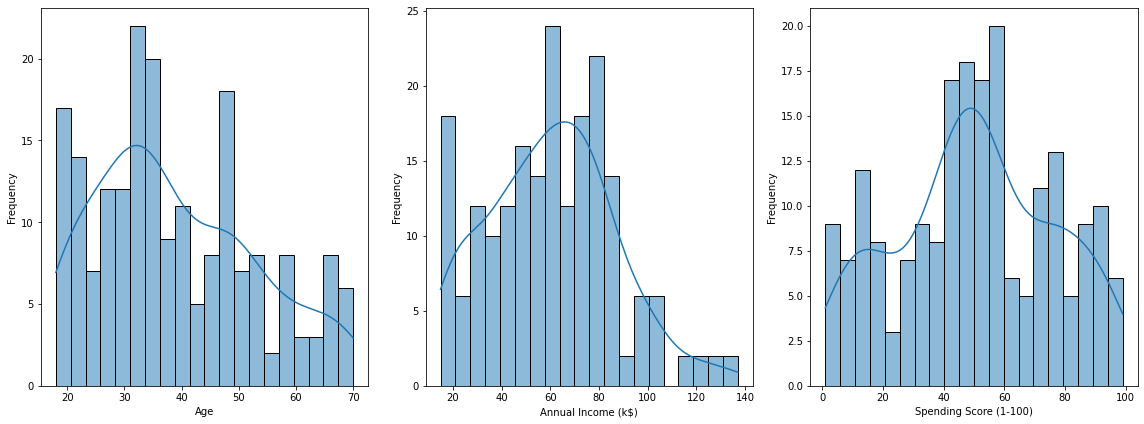

In [9]:
plt.figure(figsize=(16,6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=20, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

* The majority of mall visitors are aged between 25 and 35.
* Most visitors have an annual income ranging from 50,000 to 90,000 dollars.
* The typical spending score for visitors falls within the range of 50 to 60.

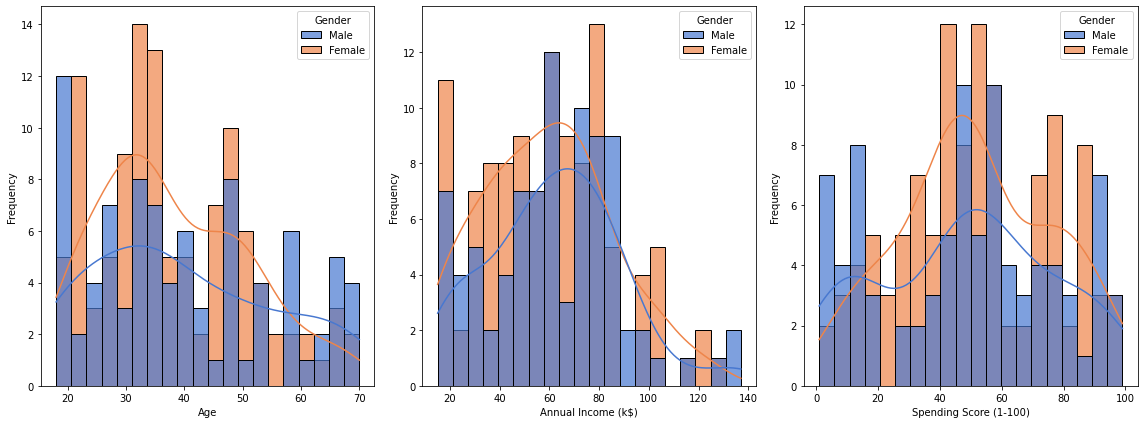

In [10]:
plt.figure(figsize=(16, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data, x=column, bins=20, kde=True, hue='Gender', palette='muted', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
data['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

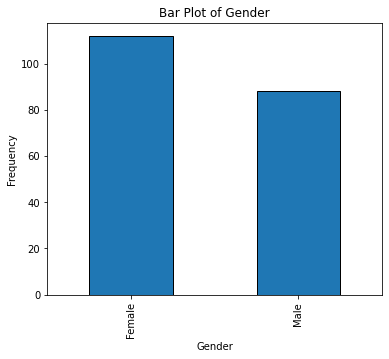

In [12]:
plt.figure(figsize=(6, 5))
data['Gender'].value_counts().plot(kind='bar', edgecolor='k')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Bar Plot of Gender')
plt.show()

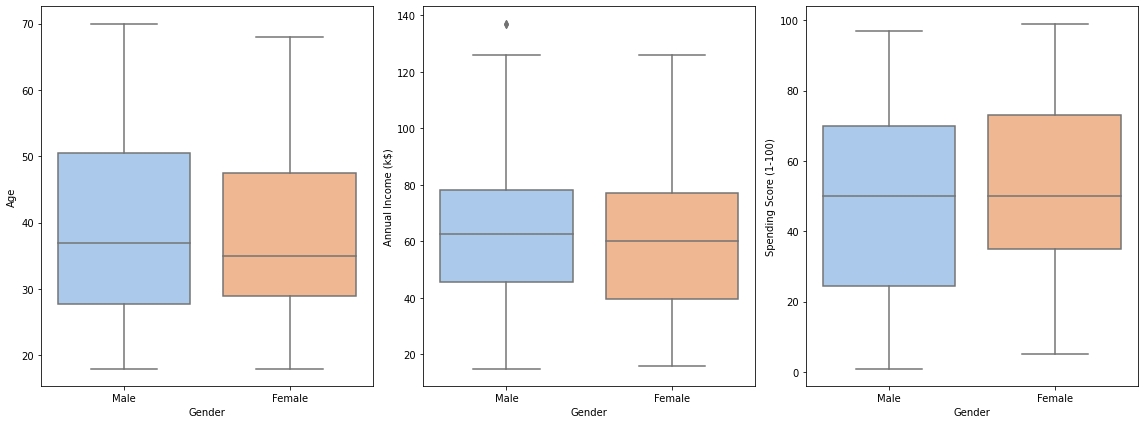

In [15]:
plt.figure(figsize=(16, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Gender', y=column, data=data, palette='pastel')
    plt.xlabel('Gender')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

### Outlier in Annual Income

In [17]:
data = data[data['Annual Income (k$)'] <=110]

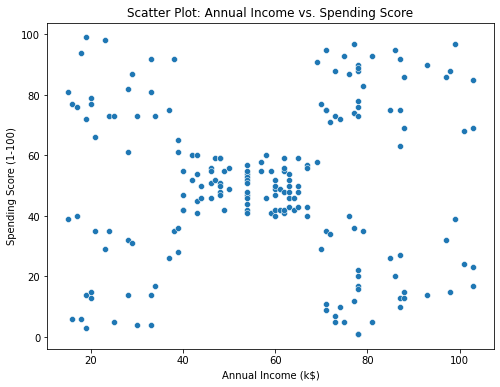

In [18]:
# Create a scatter plot to visualize the relationship between 'Annual Income (k$)' and 'Spending Score (1-100)'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot: Annual Income vs. Spending Score')
plt.show()

<Figure size 576x432 with 0 Axes>

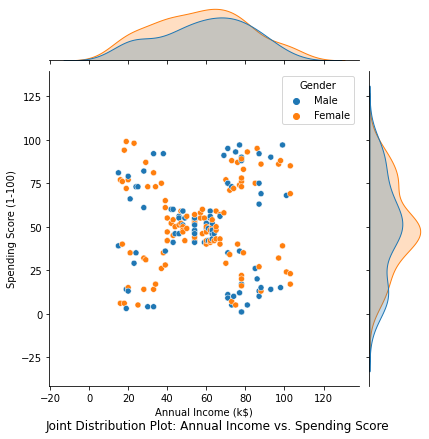

In [19]:
# Create a joint distribution plot to visualize the density of data points for both variables
plt.figure(figsize=(8, 6))
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data,hue='Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.suptitle('Joint Distribution Plot: Annual Income vs. Spending Score', y=0.02, fontsize=12)
plt.show()

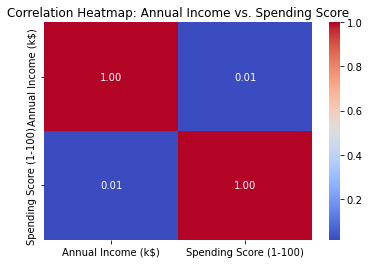

In [20]:
correlation_matrix = data[['Annual Income (k$)', 'Spending Score (1-100)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Annual Income vs. Spending Score')
plt.show()

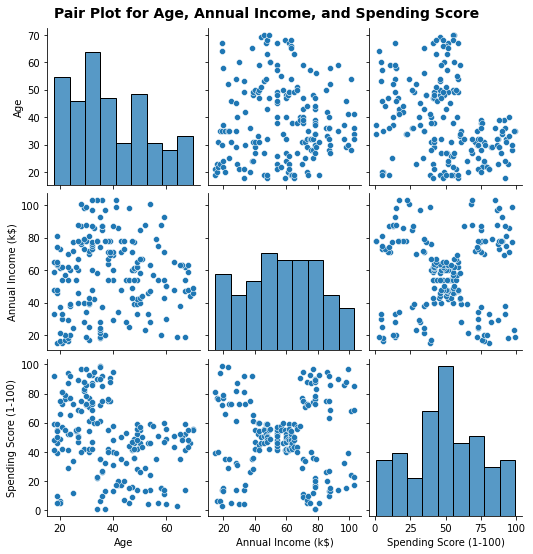

In [21]:
sns.pairplot(data[numerical_columns], diag_kind='hist', markers='o', palette='pastel')
plt.suptitle('Pair Plot for Age, Annual Income, and Spending Score', y=1.02, fontsize=14, fontweight='bold')
plt.show()

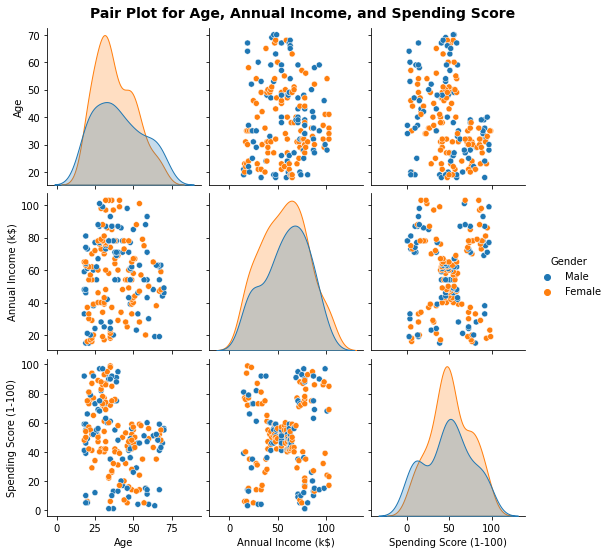

In [22]:
data1=data.drop('CustomerID',axis=1)
sns.pairplot(data1, hue='Gender')
plt.suptitle('Pair Plot for Age, Annual Income, and Spending Score', y=1.02, fontsize=14, fontweight='bold')
plt.show()

In [23]:
data.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,37.981481,57.009259,51.453704
Male,40.190476,59.083333,48.642857


In [24]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.015813,0.992695,0.016388
Age,-0.015813,1.000000,0.007716,-0.331933
Annual Income (k$),0.992695,0.007716,1.000000,0.014079
Spending Score (1-100),0.016388,-0.331933,0.014079,1.000000


<AxesSubplot:>

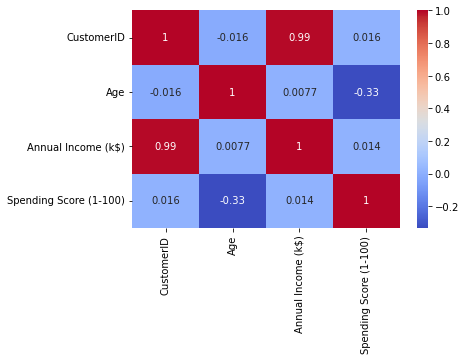

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [26]:
X = data[numerical_columns]

In [27]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [28]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

### Plotting the Elbow Method graph

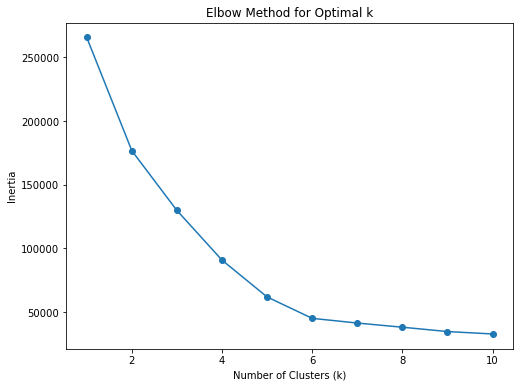

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [30]:
# Fit K-means with the chosen number of clusters
k = 5  # Set the number of clusters based on the Elbow Method graph (where the elbow occurs)
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

### Visualize the clusters

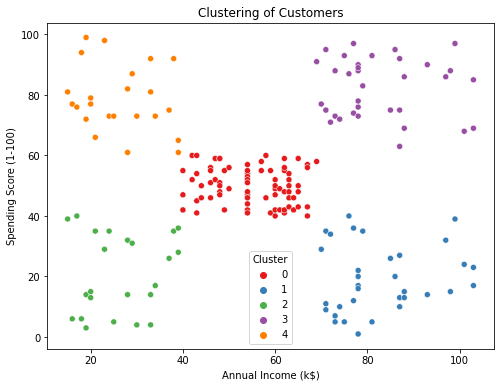

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Customers')
plt.show()

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Finding the optimal number of clusters using the Silhouette Method

In [33]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

### Plotting the Silhouette Scores

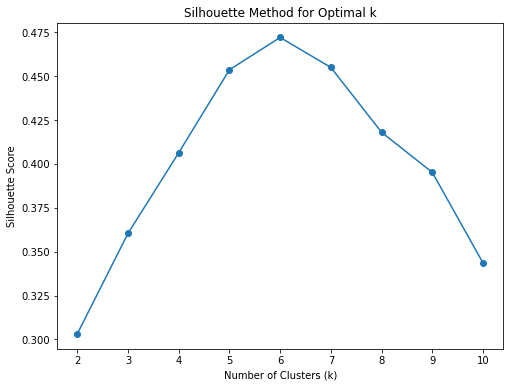

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

In [35]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

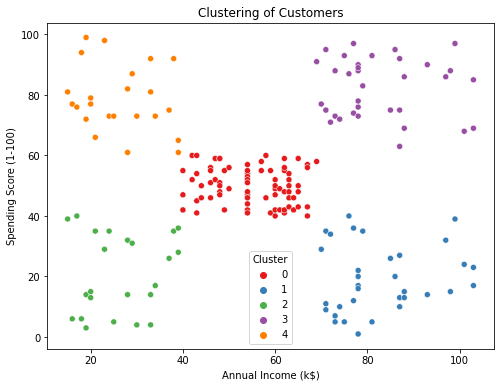

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Customers')
plt.show()

In [37]:
centers =kmeans.cluster_centers_

In [38]:
centers

array([[43.28571429, 54.81818182, 49.88311688],
       [40.52941176, 82.64705882, 18.76470588],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.57142857, 82.25714286, 82.17142857],
       [25.52173913, 26.30434783, 78.56521739]])

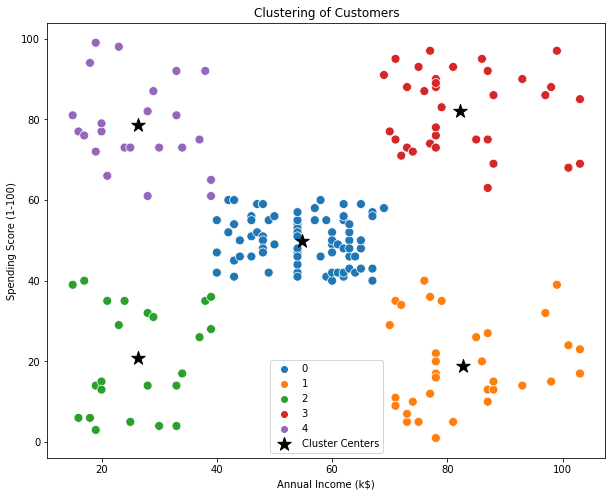

In [39]:
# Plotting the clustered data points and cluster centers
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=80)
plt.scatter(x=centers[:, 1], y=centers[:, 2], s=200, c='black', marker='*', label='Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Customers')
plt.legend()
plt.show()

In [40]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

In [41]:
pd.crosstab(data['Cluster'],data['Gender'],normalize='index')

Gender,Female,Male
Cluster,,
0,0.584416,0.415584
1,0.470588,0.529412
2,0.608696,0.391304
3,0.542857,0.457143
4,0.608696,0.391304


In [42]:
data.groupby('Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,43.285714,54.818182,49.883117
1,40.529412,82.647059,18.764706
2,45.217391,26.304348,20.913043
3,32.571429,82.257143,82.171429
4,25.521739,26.304348,78.565217


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scale = StandardScaler()

In [50]:
df=data.drop('CustomerID',axis=1)

In [51]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender_Male
0,19,15,39,2,1
1,21,15,81,4,1
2,20,16,6,2,0
3,23,16,77,4,0
4,31,17,40,2,0


In [52]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [53]:
df = scale.fit_transform(df)

In [54]:
df= pd.DataFrame(scale.fit_transform(df))
df.head()

,0,1,2,3
0,-1.408634,-1.851859,-0.441502,1.133893
1,-1.267403,-1.851859,1.210597,1.133893
2,-1.338018,-1.808709,-1.739580,-0.881917
3,-1.126172,-1.808709,1.053254,-0.881917
4,-0.561247,-1.765559,-0.402167,-0.881917


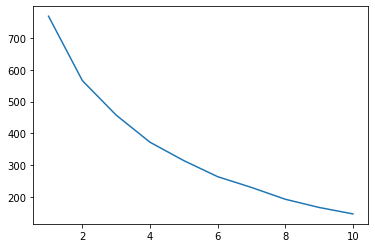

In [55]:
intertia_scores=[]
for i in range(1,11):
    kmeans_new=KMeans(n_clusters=i)
    kmeans_new.fit(df)
    intertia_scores.append(kmeans_new.inertia_)
plt.plot(range(1,11),intertia_scores)

In [56]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
187,188,Male,28,101,68,3
188,189,Female,41,103,17,1
189,190,Female,36,103,85,3
190,191,Female,34,103,23,1


In [60]:
data.to_csv("C:/Users/HP/Clustered_data.csv", index=False)